In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

MNIST 데이터셋을 로딩하는 `input_data`는 GitHub의 [tensorflow/contrib/learn/python/learn/datasets/mnist.py](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/contrib/learn/python/learn/datasets/mnist.py) 코드 참고.

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('data')

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [3]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000,))

In [4]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000,))

In [5]:
28 * 28

784

In [6]:
mnist.train.images.min(), mnist.train.images.max()

(0.0, 1.0)

In [7]:
mnist.train.labels.min(), mnist.train.labels.max()

(0, 9)

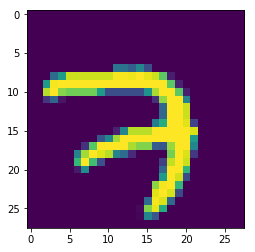

In [8]:
plt.imshow(mnist.train.images[0].reshape(28, 28))
plt.show()

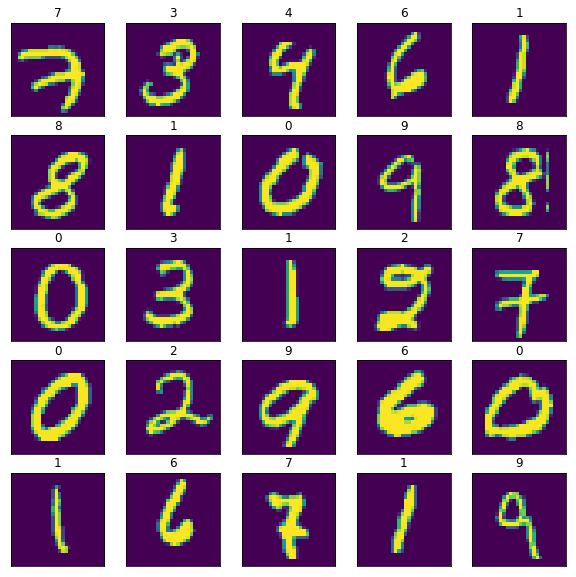

In [9]:
images = mnist.train.images
labels = mnist.train.labels

fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.imshow(images[i].reshape(28, 28))
    ax.set_title(labels[i])

plt.show()

In [10]:
learning_rate = 0.05
batch_size = 100

In [11]:
x = tf.placeholder(tf.float32, [None, 28 * 28])
y = tf.placeholder(tf.int64, [None])

w = tf.Variable(tf.truncated_normal([28 * 28, 10], stddev=0.1))
b = tf.Variable(tf.truncated_normal([10], stddev=0.1))

u = tf.matmul(x, w) + b
z = tf.nn.softmax(u)

cross_entropy = -tf.reduce_sum(tf.one_hot(y, 10) * tf.log(z), axis=1)
loss = tf.reduce_mean(cross_entropy)

train = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [12]:
predict = tf.argmax(z, axis=1)
correct = tf.equal(predict, y)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [13]:
session = tf.Session()
session.run(tf.global_variables_initializer())

test_data = {
    x: mnist.test.images,
    y: mnist.test.labels
}

for i in range(100):
    print('----')
    print(i + 1)
    for i in range(10):
        images, labels = mnist.train.next_batch(batch_size)
        data = {
            x: images,
            y: labels
        }
        session.run(train, feed_dict=data)
    print('loss = %f' % session.run(loss, feed_dict=data))
    print('accuracy = %f' % session.run(accuracy, feed_dict=data))

----
1
loss = 1.779075
accuracy = 0.460000
----
2
loss = 1.423782
accuracy = 0.650000
----
3
loss = 1.376520
accuracy = 0.630000
----
4
loss = 1.177071
accuracy = 0.720000
----
5
loss = 1.040723
accuracy = 0.720000
----
6
loss = 1.023013
accuracy = 0.740000
----
7
loss = 0.871471
accuracy = 0.820000
----
8
loss = 0.751920
accuracy = 0.860000
----
9
loss = 0.859428
accuracy = 0.770000
----
10
loss = 0.709427
accuracy = 0.890000
----
11
loss = 0.804010
accuracy = 0.830000
----
12
loss = 0.764376
accuracy = 0.830000
----
13
loss = 0.727864
accuracy = 0.850000
----
14
loss = 0.644077
accuracy = 0.840000
----
15
loss = 0.668713
accuracy = 0.870000
----
16
loss = 0.631147
accuracy = 0.870000
----
17
loss = 0.686146
accuracy = 0.870000
----
18
loss = 0.615906
accuracy = 0.860000
----
19
loss = 0.722248
accuracy = 0.820000
----
20
loss = 0.501016
accuracy = 0.900000
----
21
loss = 0.518637
accuracy = 0.880000
----
22
loss = 0.635834
accuracy = 0.860000
----
23
loss = 0.655826
accuracy = 0.8100

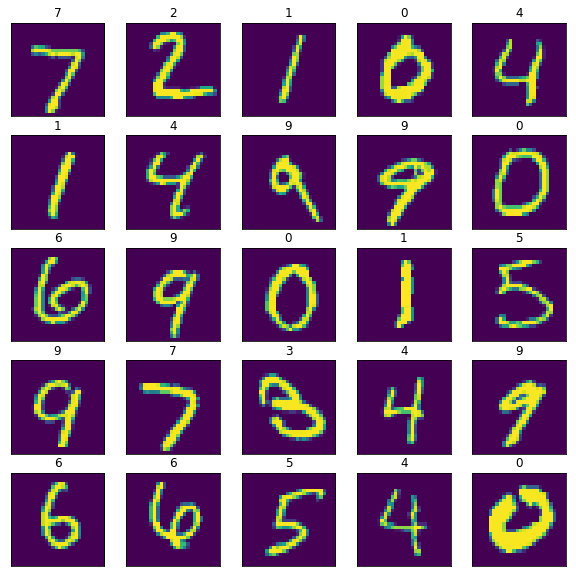

In [14]:
images = mnist.test.images
labels = mnist.test.labels

p, c = session.run([predict, correct], feed_dict=test_data)

fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in zip(np.arange(len(c))[c][:25], axes.flat):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.imshow(images[i].reshape(28, 28))
    ax.set_title(labels[i])

plt.show()

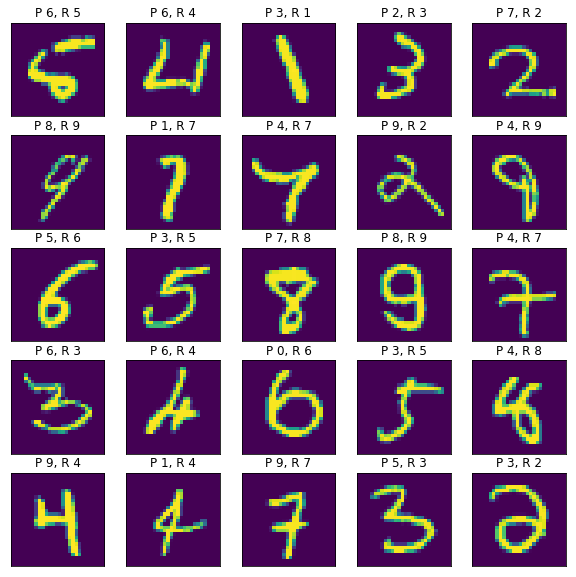

In [15]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in zip(np.arange(len(c))[~c][:25], axes.flat):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.imshow(images[i].reshape(28, 28))
    ax.set_title('P {}, R {}'.format(p[i], labels[i]))

plt.show()